In [35]:
import json
import pandas as pd
from pathlib import Path
from fastai.vision.all import *

In [36]:
dataset_root ='/kaggle/input/batata'

with open(dataset_root + '/' + 'cleanResult.json') as f:
    data = json.load(f)

In [40]:
df = pd.DataFrame(data)
dblock = DataBlock(
    blocks=(ImageBlock, CategoryBlock),
    get_x=ColReader('image_path'),
    get_y=ColReader('is_student'),
    splitter=RandomSplitter(valid_pct=0.3, seed=42), 
    item_tfms=Resize(256),
    batch_tfms=aug_transforms()
)

In [45]:
dls = dblock.dataloaders(df, bs=32)
# dls.show_batch(max_n=6, nrows=2, unique=False)
learner = vision_learner(dls,models.resnet34, pretrained=True)

Downloading: "https://download.pytorch.org/models/resnet34-b627a593.pth" to /root/.cache/torch/hub/checkpoints/resnet34-b627a593.pth
100%|██████████| 83.3M/83.3M [00:00<00:00, 195MB/s]


In [46]:
learner.summary()

Sequential (Input shape: 32 x 3 x 256 x 256)
Layer (type)         Output Shape         Param #    Trainable 
                     32 x 64 x 128 x 128 
Conv2d                                    9408       False     
BatchNorm2d                               128        True      
ReLU                                                           
____________________________________________________________________________
                     32 x 64 x 64 x 64   
MaxPool2d                                                      
Conv2d                                    36864      False     
BatchNorm2d                               128        True      
ReLU                                                           
Conv2d                                    36864      False     
BatchNorm2d                               128        True      
Conv2d                                    36864      False     
BatchNorm2d                               128        True      
ReLU                      

SuggestedLRs(valley=0.0014454397605732083)

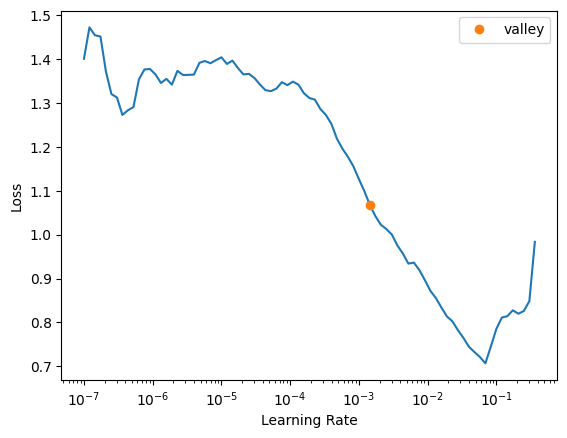

In [47]:
learner.lr_find()

In [48]:
learner.fine_tune(4, base_lr=0.0014454397605732083)

epoch,train_loss,valid_loss,time
0,0.390622,0.048927,00:36


epoch,train_loss,valid_loss,time
0,0.134101,0.017739,00:38
1,0.062228,0.013569,00:37
2,0.039700,0.006237,00:37
3,0.028037,0.004130,00:37


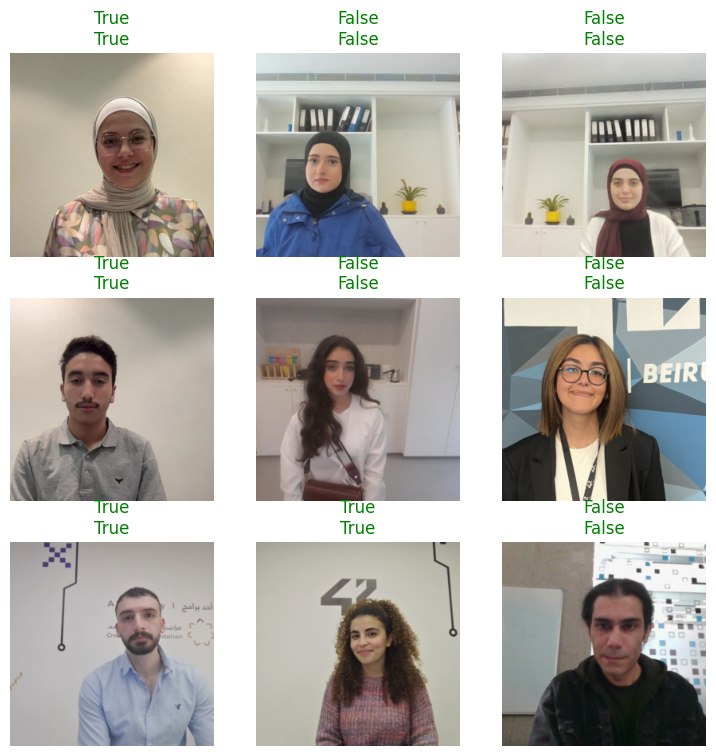

In [49]:
learner.show_results()

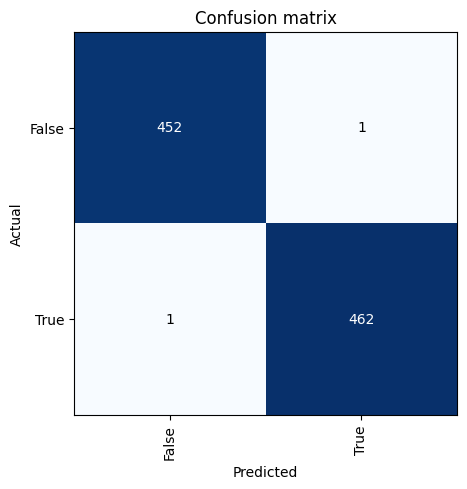

In [50]:
interp = ClassificationInterpretation.from_learner(learner)
interp.plot_confusion_matrix()

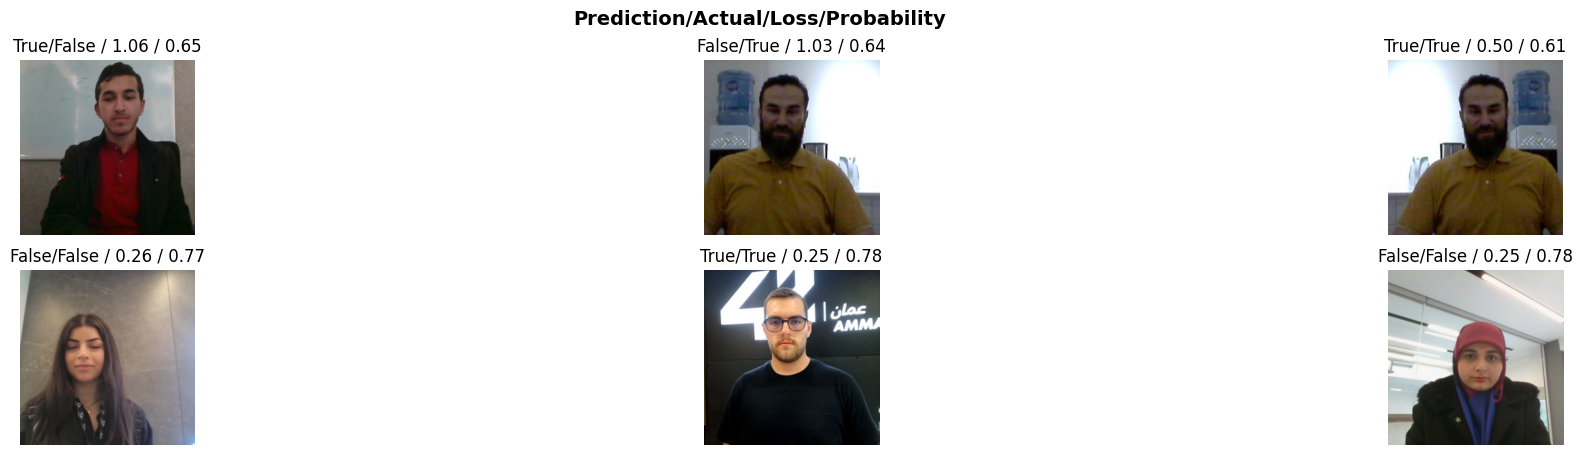

In [51]:
interp.plot_top_losses(6,figsize = (25,5))

In [52]:
learner.export('trained_model.pkl')